# Alternative and Quantitative Investment Strategies

Grenoble INP - Ensimag

Objectives: 
1. Be familiar with trades data and time series
2. Be comfortable with the main functions of the Pandas Python module
3. Be able to manipulate a dataset and answer functional questions using it

#### Modules

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import statsmodels.api as sm

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## 1. Read and enrich the data set

### 1.1 Read
Read the data set given in the file TP1_trades_data_clean.csv and make sure the timestamp column has the appropriate type.

In [4]:
df = pd.read_csv("TP1_trades_data_clean.csv")

df.timestamp = pd.to_datetime(df.timestamp)

df.head()

,timestamp,trade_id,price,amount,taker_side_sell,exchange,pair
0,2022-10-24 14:00:00.000000000,1730418307.0,19352.4,0.00099,True,bnce,btc-usdt
1,2022-10-24 14:00:00.000999936,1730418309.0,19352.4,0.00077,True,bnce,btc-usdt
2,2022-10-24 14:00:00.000999936,1730418308.0,19352.4,0.00339,True,bnce,btc-usdt
3,2022-10-24 14:00:00.001999872,1730418311.0,19352.4,0.00067,True,bnce,btc-usdt
4,2022-10-24 14:00:00.001999872,1730418310.0,19352.4,0.00455,True,bnce,btc-usdt


### 1.2 Add information about the exchange type

Add a column *dex_trade* in the DataFrame to indicate if a trade was made on a decentralized exchange (true) or on a centralized exchange (false), knowing that 
- bnce (Binance), huob (Huobi), ftxx (FTX), cbse (Coinbase), stmp (Bitstamp), itbi (itBit), gmni (Gemini), cexi (Cex.io) and btrx (Bitrex) are **centralized** exchanges
- usp2 (Uniswap V2), usp3 (Uniswap V3), crv2 (Curve V2) and crv3 (Curve V3) are **decentralized** exchanges.

Useful methods: *map*

In [5]:
df['dex_trade'] = df.exchange.map({"bnce":False, "huob":False, "ftxx":False, "cbse":False, "stmp":False, "itbi":False, "gmni":False, "cexi":False, "btrx":False, "usp2": True, "usp3":True, "crv2":True, "crv3":True})

df.head()

,timestamp,trade_id,price,amount,taker_side_sell,exchange,pair,dex_trade
0,2022-10-24 14:00:00.000000000,1730418307.0,19352.4,0.00099,True,bnce,btc-usdt,False
1,2022-10-24 14:00:00.000999936,1730418309.0,19352.4,0.00077,True,bnce,btc-usdt,False
2,2022-10-24 14:00:00.000999936,1730418308.0,19352.4,0.00339,True,bnce,btc-usdt,False
3,2022-10-24 14:00:00.001999872,1730418311.0,19352.4,0.00067,True,bnce,btc-usdt,False
4,2022-10-24 14:00:00.001999872,1730418310.0,19352.4,0.00455,True,bnce,btc-usdt,False


Create two new columns *base* and *quote* based on the pair column. 

Reminder: in the pair X-Y, X is the base asset and Y is the quote asset.

In [6]:
df["base"] = df.pair.map(lambda x: x.split("-")[0])
df["quote"] = df.pair.map(lambda x: x.split("-")[1])

df.head()

,timestamp,trade_id,price,amount,taker_side_sell,exchange,pair,dex_trade,base,quote
0,2022-10-24 14:00:00.000000000,1730418307.0,19352.4,0.00099,True,bnce,btc-usdt,False,btc,usdt
1,2022-10-24 14:00:00.000999936,1730418309.0,19352.4,0.00077,True,bnce,btc-usdt,False,btc,usdt
2,2022-10-24 14:00:00.000999936,1730418308.0,19352.4,0.00339,True,bnce,btc-usdt,False,btc,usdt
3,2022-10-24 14:00:00.001999872,1730418311.0,19352.4,0.00067,True,bnce,btc-usdt,False,btc,usdt
4,2022-10-24 14:00:00.001999872,1730418310.0,19352.4,0.00455,True,bnce,btc-usdt,False,btc,usdt


How many distinct base/quote asset do we have?

In [7]:
len(df.pair.unique())

17

## 2. Study of the volume

### 2.1 General study

For each trade, compute the volume in quote asset and store it in a new column named *volume*.
**NB:** as all the quote assets are USD-pegged, we can now compare the volumes between instruments.

Reminder: volume = price * amount

In [8]:
df["volume"] = df.amount * df.price

df.head()

,timestamp,trade_id,price,amount,taker_side_sell,exchange,pair,dex_trade,base,quote,volume
0,2022-10-24 14:00:00.000000000,1730418307.0,19352.4,0.00099,True,bnce,btc-usdt,False,btc,usdt,19.158876
1,2022-10-24 14:00:00.000999936,1730418309.0,19352.4,0.00077,True,bnce,btc-usdt,False,btc,usdt,14.901348
2,2022-10-24 14:00:00.000999936,1730418308.0,19352.4,0.00339,True,bnce,btc-usdt,False,btc,usdt,65.604636
3,2022-10-24 14:00:00.001999872,1730418311.0,19352.4,0.00067,True,bnce,btc-usdt,False,btc,usdt,12.966108
4,2022-10-24 14:00:00.001999872,1730418310.0,19352.4,0.00455,True,bnce,btc-usdt,False,btc,usdt,88.053420


What are the 10 largest trades in terms of volume? Are they the same as the largest ones in terms of amount?

In [9]:
df.sort_values("volume", ascending=False).head(10)

,timestamp,trade_id,price,amount,taker_side_sell,exchange,pair,dex_trade,base,quote,volume
740500,2022-10-24 15:21:59.000000000,0x3416cf6c708da44db2624d63ea0aaef7113527c6-0xf...,1.000068,1.999864e+07,False,usp3,usdc-usdt,True,usdc,usdt,2.000000e+07
359027,2022-10-24 14:30:59.000000000,0x3416cf6c708da44db2624d63ea0aaef7113527c6-0x6...,0.999851,4.425781e+06,True,usp3,usdc-usdt,True,usdc,usdt,4.425122e+06
359031,2022-10-24 14:30:59.000000000,0x3416cf6c708da44db2624d63ea0aaef7113527c6-0xd...,1.000053,4.424885e+06,False,usp3,usdc-usdt,True,usdc,usdt,4.425120e+06
347462,2022-10-24 14:29:59.000000000,0x5777d92f208679db4b9778590fa3cab3ac9e2168-0xb...,1.000106,2.520959e+06,False,usp3,dai-usdc,True,dai,usdc,2.521227e+06
347460,2022-10-24 14:29:59.000000000,0x5777d92f208679db4b9778590fa3cab3ac9e2168-0x6...,0.999906,2.499840e+06,True,usp3,dai-usdc,True,dai,usdc,2.499606e+06
577100,2022-10-24 14:56:00.945999872,1730811532.0,19259.140000,1.257620e+02,True,bnce,btc-usdt,False,btc,usdt,2.422068e+06
803645,2022-10-24 15:34:11.000000000,0x5777d92f208679db4b9778590fa3cab3ac9e2168-0x1...,1.000106,2.247227e+06,False,usp3,dai-usdc,True,dai,usdc,2.247465e+06
803644,2022-10-24 15:34:11.000000000,0x5777d92f208679db4b9778590fa3cab3ac9e2168-0xc...,0.999906,2.242144e+06,True,usp3,dai-usdc,True,dai,usdc,2.241934e+06
402910,2022-10-24 14:35:11.000000000,0x3416cf6c708da44db2624d63ea0aaef7113527c6-0x4...,0.999843,1.574205e+06,True,usp3,usdc-usdt,True,usdc,usdt,1.573958e+06
359028,2022-10-24 14:30:59.000000000,0x3416cf6c708da44db2624d63ea0aaef7113527c6-0x4...,0.999858,9.475110e+05,True,usp3,usdc-usdt,True,usdc,usdt,9.473765e+05


In [10]:
df.sort_values("amount", ascending=False).head(10)

,timestamp,trade_id,price,amount,taker_side_sell,exchange,pair,dex_trade,base,quote,volume
740500,2022-10-24 15:21:59,0x3416cf6c708da44db2624d63ea0aaef7113527c6-0xf...,1.000068,1.999864e+07,False,usp3,usdc-usdt,True,usdc,usdt,2.000000e+07
359027,2022-10-24 14:30:59,0x3416cf6c708da44db2624d63ea0aaef7113527c6-0x6...,0.999851,4.425781e+06,True,usp3,usdc-usdt,True,usdc,usdt,4.425122e+06
359031,2022-10-24 14:30:59,0x3416cf6c708da44db2624d63ea0aaef7113527c6-0xd...,1.000053,4.424885e+06,False,usp3,usdc-usdt,True,usdc,usdt,4.425120e+06
681623,2022-10-24 15:11:23,0x69d91b94f0aaf8e8a2586909fa77a5c2c89818d5-0xe...,0.037295,3.767231e+06,True,usp3,hex-usdc,True,hex,usdc,1.404982e+05
96860,2022-10-24 14:09:35,0x69d91b94f0aaf8e8a2586909fa77a5c2c89818d5-0xe...,0.037350,3.098076e+06,False,usp3,hex-usdc,True,hex,usdc,1.157138e+05
616852,2022-10-24 15:01:35,0x69d91b94f0aaf8e8a2586909fa77a5c2c89818d5-0xb...,0.037552,2.662960e+06,False,usp3,hex-usdc,True,hex,usdc,9.999899e+04
347462,2022-10-24 14:29:59,0x5777d92f208679db4b9778590fa3cab3ac9e2168-0xb...,1.000106,2.520959e+06,False,usp3,dai-usdc,True,dai,usdc,2.521227e+06
347460,2022-10-24 14:29:59,0x5777d92f208679db4b9778590fa3cab3ac9e2168-0x6...,0.999906,2.499840e+06,True,usp3,dai-usdc,True,dai,usdc,2.499606e+06
803645,2022-10-24 15:34:11,0x5777d92f208679db4b9778590fa3cab3ac9e2168-0x1...,1.000106,2.247227e+06,False,usp3,dai-usdc,True,dai,usdc,2.247465e+06
803644,2022-10-24 15:34:11,0x5777d92f208679db4b9778590fa3cab3ac9e2168-0xc...,0.999906,2.242144e+06,True,usp3,dai-usdc,True,dai,usdc,2.241934e+06


What are the 10 largest sales in terms of volume?

In [11]:
df[df.taker_side_sell == True].sort_values("amount", ascending=False).head(10)


,timestamp,trade_id,price,amount,taker_side_sell,exchange,pair,dex_trade,base,quote,volume
359027,2022-10-24 14:30:59,0x3416cf6c708da44db2624d63ea0aaef7113527c6-0x6...,0.999851,4.425781e+06,True,usp3,usdc-usdt,True,usdc,usdt,4.425122e+06
681623,2022-10-24 15:11:23,0x69d91b94f0aaf8e8a2586909fa77a5c2c89818d5-0xe...,0.037295,3.767231e+06,True,usp3,hex-usdc,True,hex,usdc,1.404982e+05
347460,2022-10-24 14:29:59,0x5777d92f208679db4b9778590fa3cab3ac9e2168-0x6...,0.999906,2.499840e+06,True,usp3,dai-usdc,True,dai,usdc,2.499606e+06
803644,2022-10-24 15:34:11,0x5777d92f208679db4b9778590fa3cab3ac9e2168-0xc...,0.999906,2.242144e+06,True,usp3,dai-usdc,True,dai,usdc,2.241934e+06
298483,2022-10-24 14:25:47,0x69d91b94f0aaf8e8a2586909fa77a5c2c89818d5-0x1...,0.037228,1.635416e+06,True,usp3,hex-usdc,True,hex,usdc,6.088248e+04
402910,2022-10-24 14:35:11,0x3416cf6c708da44db2624d63ea0aaef7113527c6-0x4...,0.999843,1.574205e+06,True,usp3,usdc-usdt,True,usdc,usdt,1.573958e+06
281119,2022-10-24 14:24:47,0x69d91b94f0aaf8e8a2586909fa77a5c2c89818d5-0x3...,0.037398,1.477368e+06,True,usp3,hex-usdc,True,hex,usdc,5.525040e+04
340049,2022-10-24 14:29:23,0x69d91b94f0aaf8e8a2586909fa77a5c2c89818d5-0x0...,0.037226,1.001998e+06,True,usp3,hex-usdc,True,hex,usdc,3.730052e+04
359028,2022-10-24 14:30:59,0x3416cf6c708da44db2624d63ea0aaef7113527c6-0x4...,0.999858,9.475110e+05,True,usp3,usdc-usdt,True,usdc,usdt,9.473765e+05
347461,2022-10-24 14:29:59,0x69d91b94f0aaf8e8a2586909fa77a5c2c89818d5-0xf...,0.037152,7.011017e+05,True,usp3,hex-usdc,True,hex,usdc,2.604720e+04


What are the 10 largest purchases on the exchanges BTRX or CEXI in terms of volume?

In [12]:
df[df.exchange.isin(["btrx", "cexi"])].sort_values("volume", ascending=False).head(10)

,timestamp,trade_id,price,amount,taker_side_sell,exchange,pair,dex_trade,base,quote,volume
202712,2022-10-24 14:18:54.240000000,58fa0dd8-e080-4e5d-8b5a-6b781178749b,1.00407,16908.149966,False,btrx,usdt-usd,False,usdt,usd,16976.966137
155889,2022-10-24 14:17:02.001999872,6972868.0,1340.00000,9.962779,True,cexi,eth-usd,False,eth,usd,13350.123860
764337,2022-10-24 15:26:19.409999872,1ee15c9f-0a34-4788-8590-036a45b8c558,19266.00000,0.640905,True,btrx,btc-usd,False,btc,usd,12347.684592
202716,2022-10-24 14:18:54.240000000,56a7cc07-3be4-4616-bc4a-7c8e529a6d6d,1.00048,10000.000000,False,btrx,usdt-usd,False,usdt,usd,10004.800000
107609,2022-10-24 14:10:45.638000128,54459.0,0.99970,10000.000000,False,cexi,usdc-usdt,False,usdc,usdt,9997.000000
202709,2022-10-24 14:18:54.240000000,8e496d91-1fe2-4aa5-b4d1-00dcd8fd36db,1.00046,9000.000000,False,btrx,usdt-usd,False,usdt,usd,9004.140000
175593,2022-10-24 14:17:43.139000064,6972918.0,1330.01000,6.466999,True,cexi,eth-usd,False,eth,usd,8601.173340
815084,2022-10-24 15:36:29.649999872,c33f3b28-d5bd-4200-b612-9d7871150ec7,19281.79700,0.409713,True,btrx,btc-usd,False,btc,usd,7900.011185
815087,2022-10-24 15:36:29.790000128,aedd5c2f-9597-4ec3-b5e6-c709e0f71f85,19281.79700,0.409713,True,btrx,btc-usd,False,btc,usd,7900.011185
815082,2022-10-24 15:36:29.550000128,83fe7683-c09b-4932-b6ad-467fb235996c,19281.79700,0.382931,True,btrx,btc-usd,False,btc,usd,7383.590287


Get the number of trades with a volume of more than 500,000

In [13]:
len(df[df.volume >= 500000])

20

Get the number of trades with a volume between 9,000 and 10,000

In [14]:
len(df[df.volume.between(9000,10000)])

4799

Get the proportion of trades on decentralized/centralized exchanges. What can you conclude on DeXes?

In [15]:
dex_trades = len(df[df.dex_trade == True])
cex_trades = len(df[df.dex_trade == False])

dex_trades/cex_trades

0.0008701398598426736

### 2.2 Volume by exchange

Create a DataFrame that for each exchange contains the following statistics on the volume: *count*, *sum*, *mean*, *median*.

In [16]:
exchange = df.groupby("exchange").volume.describe()

exchange

,count,mean,std,min,25%,50%,75%,max
exchange,,,,,,,,
bnce,655868.0,1127.455579,5401.008156,6.132000e-03,69.248351,223.279419,907.728543,2.422068e+06
btrx,684.0,885.311464,1812.689584,3.555731e-09,17.926642,118.075455,633.621642,1.697697e+04
cbse,164214.0,1100.358819,2771.583070,1.326210e-05,27.756724,291.822354,959.622121,1.927264e+05
cexi,931.0,290.962401,755.454543,7.370909e-03,45.776540,180.559070,258.601115,1.335012e+04
crv2,29.0,57510.092301,33839.360368,2.660663e+04,39845.460000,41780.504456,53720.805301,1.615661e+05
ftxx,59976.0,2108.968890,9413.278104,9.999000e-03,2.687400,63.600900,1257.363300,7.582813e+05
gmni,3400.0,1455.589079,4683.567452,2.833100e-05,2.887819,70.219092,930.333750,1.070242e+05
huob,48115.0,155.894505,1330.009746,1.474500e-05,4.017894,11.703650,28.174093,1.561680e+05
itbi,5950.0,239.143286,982.173923,1.332550e-05,0.549986,2.409825,18.125739,2.030969e+04


Sort the exchanges by total number of trades (starting by the largest one). 

In [17]:
exchange.sort_values("count", ascending=False)

,count,mean,std,min,25%,50%,75%,max
exchange,,,,,,,,
bnce,655868.0,1127.455579,5401.008156,6.132000e-03,69.248351,223.279419,907.728543,2.422068e+06
cbse,164214.0,1100.358819,2771.583070,1.326210e-05,27.756724,291.822354,959.622121,1.927264e+05
ftxx,59976.0,2108.968890,9413.278104,9.999000e-03,2.687400,63.600900,1257.363300,7.582813e+05
huob,48115.0,155.894505,1330.009746,1.474500e-05,4.017894,11.703650,28.174093,1.561680e+05
itbi,5950.0,239.143286,982.173923,1.332550e-05,0.549986,2.409825,18.125739,2.030969e+04
gmni,3400.0,1455.589079,4683.567452,2.833100e-05,2.887819,70.219092,930.333750,1.070242e+05
stmp,2090.0,2201.510000,5098.597904,1.461460e-04,57.950250,249.997498,1926.675000,6.134080e+04
cexi,931.0,290.962401,755.454543,7.370909e-03,45.776540,180.559070,258.601115,1.335012e+04
btrx,684.0,885.311464,1812.689584,3.555731e-09,17.926642,118.075455,633.621642,1.697697e+04


Conclude about the largest exchange in terms of 
- number of trades 
- total volume 
- average trade volume  
- median trade volume 

In [18]:
exchange["total"] = exchange["mean"] * exchange["count"]

exchange.sort_values("total", ascending=False)

,count,mean,std,min,25%,50%,75%,max,total
exchange,,,,,,,,,
bnce,655868.0,1127.455579,5401.008156,6.132000e-03,69.248351,223.279419,907.728543,2.422068e+06,7.394620e+08
cbse,164214.0,1100.358819,2771.583070,1.326210e-05,27.756724,291.822354,959.622121,1.927264e+05,1.806943e+08
ftxx,59976.0,2108.968890,9413.278104,9.999000e-03,2.687400,63.600900,1257.363300,7.582813e+05,1.264875e+08
usp3,583.0,86975.460545,890614.953003,1.000000e+00,501.980213,2924.378212,23188.413965,2.000000e+07,5.070669e+07
huob,48115.0,155.894505,1330.009746,1.474500e-05,4.017894,11.703650,28.174093,1.561680e+05,7.500864e+06
gmni,3400.0,1455.589079,4683.567452,2.833100e-05,2.887819,70.219092,930.333750,1.070242e+05,4.949003e+06
stmp,2090.0,2201.510000,5098.597904,1.461460e-04,57.950250,249.997498,1926.675000,6.134080e+04,4.601156e+06
crv2,29.0,57510.092301,33839.360368,2.660663e+04,39845.460000,41780.504456,53720.805301,1.615661e+05,1.667793e+06
itbi,5950.0,239.143286,982.173923,1.332550e-05,0.549986,2.409825,18.125739,2.030969e+04,1.422903e+06


In [19]:
exchange.sort_values("mean", ascending=False)

,count,mean,std,min,25%,50%,75%,max,total
exchange,,,,,,,,,
usp3,583.0,86975.460545,890614.953003,1.000000e+00,501.980213,2924.378212,23188.413965,2.000000e+07,5.070669e+07
crv2,29.0,57510.092301,33839.360368,2.660663e+04,39845.460000,41780.504456,53720.805301,1.615661e+05,1.667793e+06
stmp,2090.0,2201.510000,5098.597904,1.461460e-04,57.950250,249.997498,1926.675000,6.134080e+04,4.601156e+06
ftxx,59976.0,2108.968890,9413.278104,9.999000e-03,2.687400,63.600900,1257.363300,7.582813e+05,1.264875e+08
usp2,207.0,1896.001797,4354.034488,1.300000e-05,137.021544,500.000000,1100.234619,3.044089e+04,3.924724e+05
gmni,3400.0,1455.589079,4683.567452,2.833100e-05,2.887819,70.219092,930.333750,1.070242e+05,4.949003e+06
bnce,655868.0,1127.455579,5401.008156,6.132000e-03,69.248351,223.279419,907.728543,2.422068e+06,7.394620e+08
cbse,164214.0,1100.358819,2771.583070,1.326210e-05,27.756724,291.822354,959.622121,1.927264e+05,1.806943e+08
btrx,684.0,885.311464,1812.689584,3.555731e-09,17.926642,118.075455,633.621642,1.697697e+04,6.055530e+05


In [20]:
exchange.sort_values("50%", ascending=False)

,count,mean,std,min,25%,50%,75%,max,total
exchange,,,,,,,,,
crv2,29.0,57510.092301,33839.360368,2.660663e+04,39845.460000,41780.504456,53720.805301,1.615661e+05,1.667793e+06
usp3,583.0,86975.460545,890614.953003,1.000000e+00,501.980213,2924.378212,23188.413965,2.000000e+07,5.070669e+07
usp2,207.0,1896.001797,4354.034488,1.300000e-05,137.021544,500.000000,1100.234619,3.044089e+04,3.924724e+05
cbse,164214.0,1100.358819,2771.583070,1.326210e-05,27.756724,291.822354,959.622121,1.927264e+05,1.806943e+08
stmp,2090.0,2201.510000,5098.597904,1.461460e-04,57.950250,249.997498,1926.675000,6.134080e+04,4.601156e+06
bnce,655868.0,1127.455579,5401.008156,6.132000e-03,69.248351,223.279419,907.728543,2.422068e+06,7.394620e+08
cexi,931.0,290.962401,755.454543,7.370909e-03,45.776540,180.559070,258.601115,1.335012e+04,2.708860e+05
btrx,684.0,885.311464,1812.689584,3.555731e-09,17.926642,118.075455,633.621642,1.697697e+04,6.055530e+05
gmni,3400.0,1455.589079,4683.567452,2.833100e-05,2.887819,70.219092,930.333750,1.070242e+05,4.949003e+06


Display the total traded volume by exchange in a bar chart. Sort the exchanges by descending order.

<AxesSubplot:xlabel='exchange'>

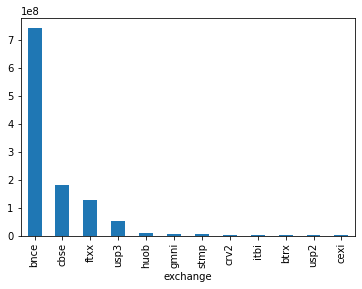

In [21]:
exchange.sort_values("total", ascending=False).total.plot.bar()

### 2.3 Volume by pair

Create a DataFrame that for each pair contains the following statistics on the volume: *count*, *sum*, *mean*, *median*.

What are the 5 pairs with the largest:
- number of trades
- total volume


In [22]:
pair = df.groupby("pair").volume.describe()

pair

,count,mean,std,min,25%,50%,75%,max
pair,,,,,,,,
ada-usdt,6671.0,512.899316,1417.751623,3.555731e-09,12.801740,57.373440,360.719895,2.630688e+04
adx-usdt,373.0,333.993022,591.892521,9.964400e+00,30.744000,123.624000,357.984700,4.899048e+03
btc-dai,557.0,670.009330,4061.557130,6.552684e+00,99.346460,200.019067,483.989750,9.181634e+04
btc-usd,99057.0,1346.678958,4455.004371,1.920100e-04,19.897772,92.792398,729.913094,2.562951e+05
btc-usdt,648742.0,1123.980346,5410.023569,1.917405e-04,66.372394,220.619291,906.674688,2.422068e+06
dai-usdc,28.0,363537.456888,839968.903216,9.609236e+01,1713.310968,11159.952752,60157.767134,2.521227e+06
dai-usdt,77.0,1442.225448,6386.179289,3.999200e-01,5.006994,20.793760,88.877742,4.999169e+04
eth-usd,90367.0,1702.845071,5513.988239,1.326210e-05,15.493871,400.974000,1644.978505,7.582813e+05
flow-usdt,24882.0,23.594412,207.592098,1.338390e-03,5.233531,10.460822,16.589561,1.649952e+04


In [23]:
pair.sort_values("count", ascending=False).head(5)

,count,mean,std,min,25%,50%,75%,max
pair,,,,,,,,
btc-usdt,648742.0,1123.980346,5410.023569,0.000192,66.372394,220.619291,906.674688,2.422068e+06
btc-usd,99057.0,1346.678958,4455.004371,0.000192,19.897772,92.792398,729.913094,2.562951e+05
eth-usd,90367.0,1702.845071,5513.988239,0.000013,15.493871,400.974000,1644.978505,7.582813e+05
flow-usdt,24882.0,23.594412,207.592098,0.001338,5.233531,10.460822,16.589561,1.649952e+04
sol-usd,22995.0,472.738257,1639.773383,0.000028,1.422375,76.192400,286.050000,9.420144e+04


In [24]:
pair['total'] = pair["count"] * pair["mean"]

pair.sort_values("total", ascending=False).head(5)

,count,mean,std,min,25%,50%,75%,max,total
pair,,,,,,,,,
btc-usdt,648742.0,1123.980346,5410.023569,1.917405e-04,66.372394,220.619291,906.674688,2.422068e+06,7.291733e+08
eth-usd,90367.0,1702.845071,5513.988239,1.326210e-05,15.493871,400.974000,1644.978505,7.582813e+05,1.538810e+08
btc-usd,99057.0,1346.678958,4455.004371,1.920100e-04,19.897772,92.792398,729.913094,2.562951e+05,1.333980e+08
usdc-usdt,4438.0,7591.337951,315797.386732,9.999997e-03,1.457029,2.168075,5.482478,2.000000e+07,3.369036e+07
xrp-usdt,18617.0,1038.398005,3699.677356,4.519333e-09,40.686300,125.681101,572.347500,1.814948e+05,1.933186e+07


Are these the same pairs ? 

For each exchange, get the best pair in terms of number of trades, then in terms of volume.

In [25]:
exchange["best_number_trade_pair"] = df.pivot_table(index="pair", columns="exchange", values="trade_id", aggfunc="count").idxmax()
exchange["best_volume_pair"] = df.pivot_table(index="pair", columns="exchange", values="volume").idxmax()

exchange

,count,mean,std,min,25%,50%,75%,max,total,best_number_trade_pair,best_volume_pair
exchange,,,,,,,,,,,
bnce,655868.0,1127.455579,5401.008156,6.132000e-03,69.248351,223.279419,907.728543,2.422068e+06,7.394620e+08,btc-usdt,xrp-usdt
btrx,684.0,885.311464,1812.689584,3.555731e-09,17.926642,118.075455,633.621642,1.697697e+04,6.055530e+05,btc-usd,eth-usd
cbse,164214.0,1100.358819,2771.583070,1.326210e-05,27.756724,291.822354,959.622121,1.927264e+05,1.806943e+08,btc-usd,btc-usdt
cexi,931.0,290.962401,755.454543,7.370909e-03,45.776540,180.559070,258.601115,1.335012e+04,2.708860e+05,eth-usd,usdc-usdt
crv2,29.0,57510.092301,33839.360368,2.660663e+04,39845.460000,41780.504456,53720.805301,1.615661e+05,1.667793e+06,weth-usdt,weth-usdt
ftxx,59976.0,2108.968890,9413.278104,9.999000e-03,2.687400,63.600900,1257.363300,7.582813e+05,1.264875e+08,eth-usd,btc-usd
gmni,3400.0,1455.589079,4683.567452,2.833100e-05,2.887819,70.219092,930.333750,1.070242e+05,4.949003e+06,btc-usd,btc-usd
huob,48115.0,155.894505,1330.009746,1.474500e-05,4.017894,11.703650,28.174093,1.561680e+05,7.500864e+06,flow-usdt,btc-usdt
itbi,5950.0,239.143286,982.173923,1.332550e-05,0.549986,2.409825,18.125739,2.030969e+04,1.422903e+06,btc-usd,btc-usd


For each pair, get the exchange where there are the most trades. In the following, we will name this exchange "the best exchange" for a pair.

In [26]:
pair["best_exchange"] = df.pivot_table(index="pair", columns="exchange", values="trade_id", aggfunc="count").idxmax(axis=1)

pair

,count,mean,std,min,25%,50%,75%,max,total,best_exchange
pair,,,,,,,,,,
ada-usdt,6671.0,512.899316,1417.751623,3.555731e-09,12.801740,57.373440,360.719895,2.630688e+04,3.421551e+06,bnce
adx-usdt,373.0,333.993022,591.892521,9.964400e+00,30.744000,123.624000,357.984700,4.899048e+03,1.245794e+05,bnce
btc-dai,557.0,670.009330,4061.557130,6.552684e+00,99.346460,200.019067,483.989750,9.181634e+04,3.731952e+05,bnce
btc-usd,99057.0,1346.678958,4455.004371,1.920100e-04,19.897772,92.792398,729.913094,2.562951e+05,1.333980e+08,cbse
btc-usdt,648742.0,1123.980346,5410.023569,1.917405e-04,66.372394,220.619291,906.674688,2.422068e+06,7.291733e+08,bnce
dai-usdc,28.0,363537.456888,839968.903216,9.609236e+01,1713.310968,11159.952752,60157.767134,2.521227e+06,1.017905e+07,usp3
dai-usdt,77.0,1442.225448,6386.179289,3.999200e-01,5.006994,20.793760,88.877742,4.999169e+04,1.110514e+05,huob
eth-usd,90367.0,1702.845071,5513.988239,1.326210e-05,15.493871,400.974000,1644.978505,7.582813e+05,1.538810e+08,cbse
flow-usdt,24882.0,23.594412,207.592098,1.338390e-03,5.233531,10.460822,16.589561,1.649952e+04,5.870762e+05,huob


For how many pairs is each exchange the best exchange?

Display this result in a pie chart.

<AxesSubplot:ylabel='count'>

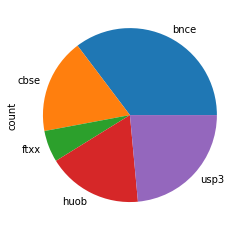

In [27]:
pair.groupby("best_exchange").count()["count"].plot.pie()

What can you conclude about USP3?

## 3. Time analysis

Construct a new DataFrame indexed by minute containing the number of trades (per minute) and the total volume traded (per minute), both on all exchanges combined.

In [28]:
time = pd.DataFrame()
time["trade_number"] = df.resample(rule="1Min", on="timestamp").trade_id.count()
time["volume"] = df.resample(rule="1Min", on="timestamp").volume.sum()

time.head()

,trade_number,volume
timestamp,,
2022-10-24 14:00:00,11546,1.457491e+07
2022-10-24 14:01:00,9977,1.084202e+07
2022-10-24 14:02:00,11008,1.302045e+07
2022-10-24 14:03:00,10240,1.154291e+07
2022-10-24 14:04:00,8545,8.954532e+06


On the same graph, display minute by minute:
- the evolution of the number of trades
- the evolution of the total volume traded 

You may use different ordinates axes if needed. 

Is there a minute that is significantly different from the others? Which one is it?

Useful methods: *pyplot.gca()*, *Axes.twinx()*

<AxesSubplot:xlabel='timestamp', ylabel='Total Volume Traded'>

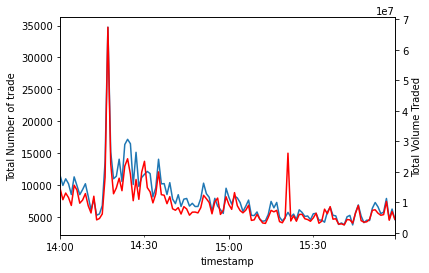

In [29]:
ax1 = time.trade_number.plot()
ax2 = ax1.twinx()
ax2.set_ylabel('Total Volume Traded')  
ax1.set_ylabel('Total Number of trade')
time.volume.plot(ax=ax2, color="red")

Is this discrepancy linked to a single exchange? In a new DataFrame, get the same information (number of trades and total volume traded) indexed by minute and by exchange.

In [30]:
time_exchange = df.groupby([pd.Grouper(key="timestamp", freq="1Min"), "exchange"]).volume.agg(trade_number="count", volume="sum")

time_exchange.head()

trade_number        volume
timestamp           exchange                            
2022-10-24 14:00:00 bnce              8682  1.050263e+07
                    btrx                 3  5.739619e+02
                    cbse              1553  2.105308e+06
                    cexi                 5  9.263800e+02
                    crv2                 3  3.986184e+05

Display on a single graph the evolution of the number of trades minute by minute for each exchange.

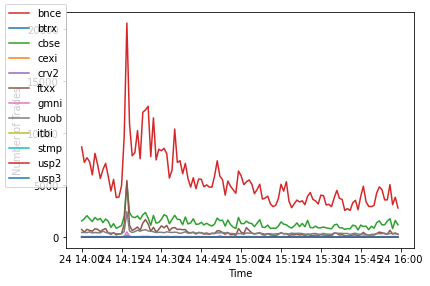

In [31]:
fig, ax = plt.subplots()

# Define a color palette with ten different colors
colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange', 'tab:purple', 
          'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']

# Iterate over each exchange
for i, (exchange, exchange_data) in enumerate(time_exchange.groupby(level="exchange")):
    color = colors[i % len(colors)]  # Use modulo operator to cycle through colors
    ax.set_xlabel('Time')
    ax.set_ylabel('Number of Trades')
    ax.plot(exchange_data.index.get_level_values('timestamp'), exchange_data['trade_number'], color=color, label=exchange)

fig.tight_layout()  
fig.legend(loc='upper left')
plt.show()


Perform the same task for the evolution of the total volume traded.

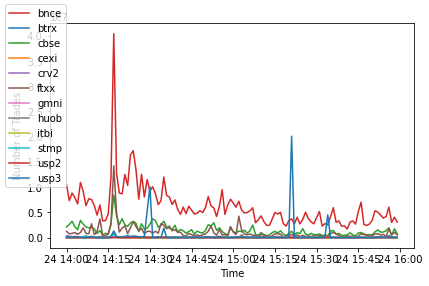

In [32]:
fig, ax = plt.subplots()

# Iterate over each exchange
for i, (exchange, exchange_data) in enumerate(time_exchange.groupby(level="exchange")):
    color = colors[i % len(colors)]  # Use modulo operator to cycle through colors
    ax.set_xlabel('Time')
    ax.set_ylabel('Number of Trades')
    ax.plot(exchange_data.index.get_level_values('timestamp'), exchange_data['volume'], color=color, label=exchange)

fig.tight_layout()  
fig.legend(loc='upper left')
plt.show()


## 4. Aggregated price computation 

### 4.1 Price aggregation on BTC-USDT

#### 4.1.1 Price study

The following study will be performed only on the pair BTC-USDT. Copy and filter your DataFrame to only keep this pair.

In [33]:
btc_usdt = df[df.pair == "btc-usdt"]

btc_usdt.head()

,timestamp,trade_id,price,amount,taker_side_sell,exchange,pair,dex_trade,base,quote,volume
0,2022-10-24 14:00:00.000000000,1730418307.0,19352.4,0.00099,True,bnce,btc-usdt,False,btc,usdt,19.158876
1,2022-10-24 14:00:00.000999936,1730418309.0,19352.4,0.00077,True,bnce,btc-usdt,False,btc,usdt,14.901348
2,2022-10-24 14:00:00.000999936,1730418308.0,19352.4,0.00339,True,bnce,btc-usdt,False,btc,usdt,65.604636
3,2022-10-24 14:00:00.001999872,1730418311.0,19352.4,0.00067,True,bnce,btc-usdt,False,btc,usdt,12.966108
4,2022-10-24 14:00:00.001999872,1730418310.0,19352.4,0.00455,True,bnce,btc-usdt,False,btc,usdt,88.053420


On how many exchanges can we trade this pair?

In [34]:
btc_usdt.exchange.nunique()

7

Study the price distribution by displaying a histogram.

<AxesSubplot:>

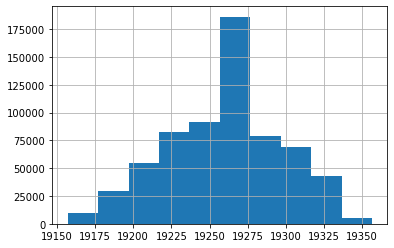

In [35]:
btc_usdt.price.hist()

#### 4.1.2. Prices per exchange

In a new DataFrame, compute the average trade price per second and per exchange. Display the evolution of these average prices.

In [36]:
btc_exchange_average = btc_usdt.groupby([pd.Grouper(key="timestamp", freq="1s"), "exchange"]).price.mean()

btc_exchange_average.head()

timestamp            exchange
2022-10-24 14:00:00  bnce        19353.440485
                     ftxx        19350.000000
                     huob        19351.640000
2022-10-24 14:00:01  bnce        19351.693095
                     huob        19349.505000
Name: price, dtype: float64

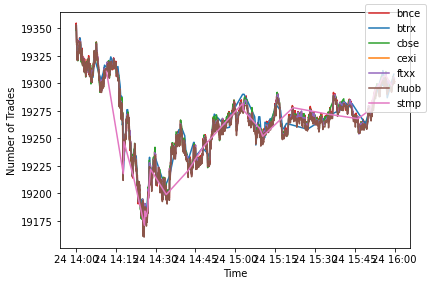

In [37]:
fig, ax = plt.subplots()

# Iterate over each exchange
for i, (exchange, exchange_data) in enumerate(btc_exchange_average.groupby(level="exchange")):
    color = colors[i % len(colors)]  # Use modulo operator to cycle through colors
    ax.set_xlabel('Time')
    ax.set_ylabel('Number of Trades')
    ax.plot(exchange_data.index.get_level_values('timestamp'), exchange_data, color=color, label=exchange)

fig.tight_layout()  
fig.legend(loc='upper right')
plt.show()

Using this DataFrame, perform a statistical analysis of these prices by answering the following questions:

- What can you say about the exchanges CEXI , BTRX and STMP?
- If you had to choose only one exchange to get the prices from, which one would you choose? 

In [38]:
btc_exchange_average.groupby('exchange').describe()

,count,mean,std,min,25%,50%,75%,max
exchange,,,,,,,,
bnce,7199.0,19265.493086,32.390918,19161.877619,19250.461354,19267.349863,19282.154944,19354.896438
btrx,120.0,19262.640940,39.336535,19171.100000,19234.164635,19264.572951,19288.832064,19341.321570
cbse,830.0,19262.072237,38.610914,19161.390000,19233.625000,19265.695000,19287.010000,19350.360000
cexi,1.0,19192.600000,NaN,19192.600000,19192.600000,19192.600000,19192.600000,19192.600000
ftxx,1310.0,19258.121697,38.399906,19163.000000,19230.625000,19262.000000,19282.000000,19353.000000
huob,3724.0,19259.991200,36.393344,19160.294444,19234.223750,19262.437857,19280.119659,19353.210000
stmp,32.0,19245.250000,43.317284,19171.000000,19214.250000,19249.500000,19278.250000,19311.000000


Filter the data set to keep only the two exchanges with the most non-zero prices. 

In [39]:
btc_exchanges = btc_exchange_average[btc_exchange_average.index.get_level_values("exchange").isin(['bnce', "huob"])]

btc_exchanges.head()

timestamp            exchange
2022-10-24 14:00:00  bnce        19353.440485
                     huob        19351.640000
2022-10-24 14:00:01  bnce        19351.693095
                     huob        19349.505000
2022-10-24 14:00:02  bnce        19350.015562
Name: price, dtype: float64

Compute the absolute relative error between the two price time series (use the most complete time series as the reference). 

$$ error = \sum_{s} \left| \frac{P^2_s - P^1_s}{P^1_s} \right|$$

$s$ being the second index and $P^1$, $P^2$ our two prices time series. 

In [47]:
reference = btc_exchanges[btc_exchanges.index.get_level_values("exchange") == "bnce"]
other = btc_exchanges[btc_exchanges.index.get_level_values("exchange") == "huob"]

reference.head()
other.head()

absolute_relative_error = ((other - reference) / reference).abs().sum()
absolute_relative_error

test
test
test


0.0

#### 4.1.3. Simple aggregated price

Using all the exchanges, compute an average price every minute.

Compute the returns.

Reminder: if $P_t$ is the price at time $t$, the return at $t$, $R_t$ is given by
$$ R_t = \frac{P_t - P_{t-1}}{P_{t-1}}$$

Tips: you can compute them using only one method applied on the prices Series. 

#### 4.1.4 VWAPs

The VWAP (Volume Weighted Average Price) is a standard in finance to aggregate prices.

Let's assume we have a set of $N$ trades, each trade $i$ has a price $P_i$ and a volume $V_i$. 
The VWAP of the dataset of trades is given by 
$$ VWAP = \frac{\sum_{i=0}^{N-1} P_i \times V_i}{\sum_{i=0}^{N-1} V_i }$$

Using all the exchanges, compute the BTC-USDT VWAP per minute.

Compare statistically (min, max, mean, quantiles, etc.) the VWAP time serie with the simple average computed on part 2.3. 

## 4.2 Comparison of BTC pairs

Filter the initial dataset to only keep pairs with BTC as a **base** asset.

### 4.2.1 Aggregated prices computation
Create a new Series containing the average price by pair, aggregating all trades. Name this Series *btc_avg_prices*.

Create a new Series containing the VWAP for each pair. Name this Series *btc_vwaps*.

Join the two Series (*btc_avg_prices* and *btc_vwaps*) in a single DataFrame and compare the two aggregation methods by displaying a scatter plot.

Given the aggregation formulas that were used, what hypothesis can you make on the difference between
- BTC-USDT and BTC-USD on one hand,
- BTC-DAI on the other hand?

Verify your hypothesis by exploring the data set and examining the price-versus-volume scatter plot.

Tip:  A *for* loop can be used to construct the scatter plot.

### 4.3 Comparison of DeX and CeX prices

What is the pair with the most trades on DeXes? 

Compute for each pair, the number of DeX trades and the number of CeX trades. Among the pairs present on both types of platforms, find the most traded pair on DeX. 

Create a new DataFrame to filter trades on this pair only.  

Compute two 1-min VWAPs, one aggregated DeX trades, and one aggregated CeX trades. Group them in a two-column DataFrame. 

Display on a single graph the DeX and CeX prices over time. What do you notice?

## 5. Stablecoins analysis

The stablecoins pairs are: usdc-usdt, usdt-usd, dai-usdc and dai-usdt. Compute the 1-min VWAP of each stablecoin pair.

Display the different prices over time on a single graph.

What can you say about dai-usdc and dai-usdt?

Filter to keep the pairs without missing prices.

Compute the common statistics on the prices (mean, median, standard deviation, etc.). Which pair seems to be the most stable? 

Compare the two pairs displaying a scatter plot. Compute the correlation between the pairs. 

Finally, perform a linear regression between stablecoin pairs and obtain the values $\alpha$ and $\beta$ such that
$$R_1 = \alpha + \beta\cdot R_2 + \epsilon,$$
where:
- $R_1$ denotes the returns of **usdt-usd**,
- $R_2$ denotes the returns of **usdc-usdt**,
- $\epsilon$ is a white noise.


Create a dataframe containing the returns of both pairs without the first *NA* value.

Use the ordinary least squares method from **statmodels** (*OLS* method) to compute the regression, store this result in a variable **reg**. 

Print out the summary of **reg**.

Use the *predict* method on **reg** to predict the returns of **usdt-usd** and plot the regressed line along with the actual returns of the cryptocurrency.